In [1]:
import pandas as pd
import seaborn as sns

In [2]:
rejected_drop = pd.read_csv('Rejected_DropNAs.csv')

In [3]:
rejected_drop.shape

(8977809, 5)

In [4]:
rejected_drop.isnull().sum()                 #No Null Values

Risk_Score           0
DI                   0
Loan Type            0
Employment Length    0
Accepted             0
dtype: int64

In [5]:
rejected_drop.dtypes

Risk_Score           float64
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [6]:
rejected_drop.describe()

,Risk_Score,DI,Accepted
count,8.977809e+06,8.977809e+06,8977809.0
mean,6.272171e+02,1.697738e+00,0.0
std,8.990980e+01,1.778247e+02,0.0
min,0.000000e+00,-1.000000e-02,0.0
25%,5.910000e+02,9.040000e-02,0.0
50%,6.360000e+02,2.053000e-01,0.0
75%,6.740000e+02,3.623000e-01,0.0
max,9.900000e+02,5.000003e+05,0.0


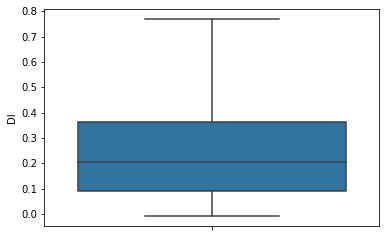

In [7]:
sns.boxplot(data=rejected_drop, y='DI', showfliers=False);

In [8]:
accepted_drop = pd.read_csv('Accepted_DropNAs.csv')

In [9]:
accepted_drop.shape

(2113644, 5)

In [10]:
accepted_drop.isnull().sum()                 #No Null Values

Risk_Score           0
DI                   0
Loan Type            0
Employment Length    0
Accepted             0
dtype: int64

In [11]:
accepted_drop.dtypes

Risk_Score           float64
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [12]:
accepted_drop.describe()

,Risk_Score,DI,Accepted
count,2.113644e+06,2.113644e+06,2113644.0
mean,7.004048e+02,1.858311e-01,1.0
std,3.272013e+01,1.181010e-01,0.0
min,6.120000e+02,-1.000000e-02,1.0
25%,6.770000e+02,1.186000e-01,1.0
50%,6.920000e+02,1.773000e-01,1.0
75%,7.170000e+02,2.432000e-01,1.0
max,8.475000e+02,9.990000e+00,1.0


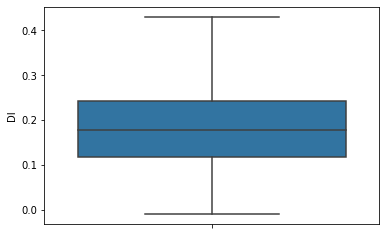

In [13]:
sns.boxplot(data=accepted_drop, y='DI', showfliers=False);

In [14]:
combo = pd.concat([accepted_drop, rejected_drop], axis=0, ignore_index=True)

In [15]:
combo.shape

(11091453, 5)

In [16]:
combo

,Risk_Score,DI,Loan Type,Employment Length,Accepted
0,677.0,0.0591,Debt Consolidation,10+ years,1
1,717.0,0.1606,Business Loan,10+ years,1
2,697.0,0.1078,Home Improvement,10+ years,1
3,787.0,0.1706,Debt Consolidation,10+ years,1
4,697.0,0.2537,Major Purchase,3 years,1
...,...,...,...,...,...
11091448,681.0,0.5515,Debt Consolidation,< 1 year,0
11091449,531.0,0.3131,Debt Consolidation,< 1 year,0
11091450,590.0,0.4126,Debt Consolidation,< 1 year,0
11091451,686.0,0.1026,Other,< 1 year,0


In [17]:
combo.dtypes

Risk_Score           float64
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

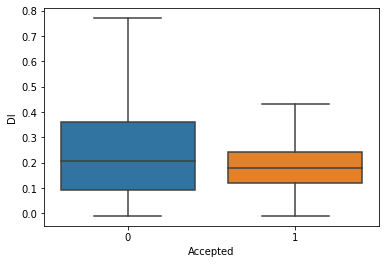

In [18]:
sns.boxplot(data=combo, y='DI', x='Accepted', showfliers=False);

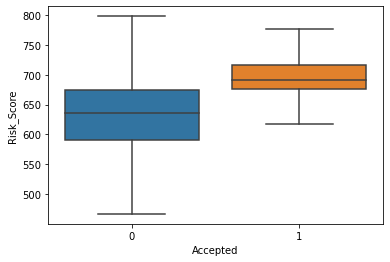

In [19]:
sns.boxplot(data=combo, y='Risk_Score', x='Accepted', showfliers=False);

In [20]:
#Top 17 Loan Types have 99% of data. Let's drop all categories below top 17. 
#We can always add more data, by consolidating at earlier stage. 

print(combo['Loan Type'].value_counts().head(17).sum())
print(len(combo))
combo['Loan Type'].value_counts().head(17).sum()/len(combo)

10993844
11091453


0.9911996201038764

In [21]:
combo['Loan Type'].value_counts().head(17)

Debt Consolidation         5351626
Credit Card Refinancing    1607167
Other                      1520254
Home Improvement            545174
Car Financing               485408
Major Purchase              305345
Medical Expenses            298996
Moving And Relocation       268057
Business Loan               257785
Home Purchase               183039
Vacation                    114862
Green Loan                   25051
Wedding                      20288
Personal Loan                 5206
Student Loan                  4913
Freedom                        411
Motorcycle Loan                262
Name: Loan Type, dtype: int64

In [22]:
sub_combo = combo[combo.groupby('Loan Type')['Loan Type'].transform('count') >= 262].copy().reset_index(drop=True)
sub_combo

,Risk_Score,DI,Loan Type,Employment Length,Accepted
0,677.0,0.0591,Debt Consolidation,10+ years,1
1,717.0,0.1606,Business Loan,10+ years,1
2,697.0,0.1078,Home Improvement,10+ years,1
3,787.0,0.1706,Debt Consolidation,10+ years,1
4,697.0,0.2537,Major Purchase,3 years,1
...,...,...,...,...,...
10993839,681.0,0.5515,Debt Consolidation,< 1 year,0
10993840,531.0,0.3131,Debt Consolidation,< 1 year,0
10993841,590.0,0.4126,Debt Consolidation,< 1 year,0
10993842,686.0,0.1026,Other,< 1 year,0


In [23]:
sub_combo.dtypes

Risk_Score           float64
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [24]:
#Convert Employment Length to Ordinal Feature:

In [25]:
sorted(sub_combo['Employment Length'].unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [26]:
emp_ordering = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
 ]

In [27]:
def ordinal_encode(df, column, ordering):
    df[column] = df[column].apply(lambda x: ordering.index(x))

In [28]:
ordinal_encode(sub_combo, 'Employment Length', emp_ordering)

In [29]:
sub_combo

,Risk_Score,DI,Loan Type,Employment Length,Accepted
0,677.0,0.0591,Debt Consolidation,10,1
1,717.0,0.1606,Business Loan,10,1
2,697.0,0.1078,Home Improvement,10,1
3,787.0,0.1706,Debt Consolidation,10,1
4,697.0,0.2537,Major Purchase,3,1
...,...,...,...,...,...
10993839,681.0,0.5515,Debt Consolidation,0,0
10993840,531.0,0.3131,Debt Consolidation,0,0
10993841,590.0,0.4126,Debt Consolidation,0,0
10993842,686.0,0.1026,Other,0,0


In [30]:
sub_combo.dtypes

Risk_Score           float64
DI                   float64
Loan Type             object
Employment Length      int64
Accepted               int64
dtype: object

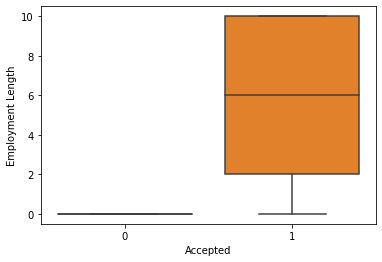

In [31]:
sns.boxplot(data=sub_combo, y='Employment Length', x='Accepted', showfliers=False);

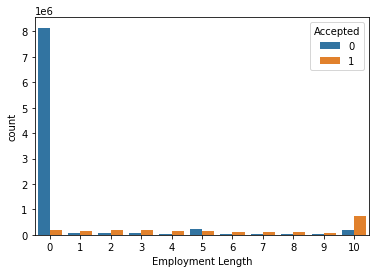

In [32]:
sns.countplot(data=sub_combo, x='Employment Length', hue='Accepted');

In [33]:
#Dummify Loan Type:

In [34]:
def onehot_encode(df, column):
        dummies = pd.get_dummies(df[column])
        df_new = pd.concat([df, dummies], axis=1)
        df_new = df_new.drop(column, axis=1)
        return df_new

In [35]:
new_combo = onehot_encode(sub_combo, 'Loan Type')
new_combo

,Risk_Score,DI,Employment Length,Accepted,Business Loan,Car Financing,Credit Card Refinancing,Debt Consolidation,Freedom,Green Loan,...,Home Purchase,Major Purchase,Medical Expenses,Motorcycle Loan,Moving And Relocation,Other,Personal Loan,Student Loan,Vacation,Wedding
0,677.0,0.0591,10,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,717.0,0.1606,10,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,697.0,0.1078,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,787.0,0.1706,10,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,697.0,0.2537,3,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993839,681.0,0.5515,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10993840,531.0,0.3131,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10993841,590.0,0.4126,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10993842,686.0,0.1026,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
sub_combo

,Risk_Score,DI,Loan Type,Employment Length,Accepted
0,677.0,0.0591,Debt Consolidation,10,1
1,717.0,0.1606,Business Loan,10,1
2,697.0,0.1078,Home Improvement,10,1
3,787.0,0.1706,Debt Consolidation,10,1
4,697.0,0.2537,Major Purchase,3,1
...,...,...,...,...,...
10993839,681.0,0.5515,Debt Consolidation,0,0
10993840,531.0,0.3131,Debt Consolidation,0,0
10993841,590.0,0.4126,Debt Consolidation,0,0
10993842,686.0,0.1026,Other,0,0


In [37]:
new_combo.dtypes

Risk_Score                 float64
DI                         float64
Employment Length            int64
Accepted                     int64
Business Loan                uint8
Car Financing                uint8
Credit Card Refinancing      uint8
Debt Consolidation           uint8
Freedom                      uint8
Green Loan                   uint8
Home Improvement             uint8
Home Purchase                uint8
Major Purchase               uint8
Medical Expenses             uint8
Motorcycle Loan              uint8
Moving And Relocation        uint8
Other                        uint8
Personal Loan                uint8
Student Loan                 uint8
Vacation                     uint8
Wedding                      uint8
dtype: object

In [38]:
#new_combo.describe()

In [39]:
y = new_combo['Accepted']
X = new_combo.drop('Accepted', axis=1)

In [40]:
X

,Risk_Score,DI,Employment Length,Business Loan,Car Financing,Credit Card Refinancing,Debt Consolidation,Freedom,Green Loan,Home Improvement,Home Purchase,Major Purchase,Medical Expenses,Motorcycle Loan,Moving And Relocation,Other,Personal Loan,Student Loan,Vacation,Wedding
0,677.0,0.0591,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,717.0,0.1606,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,697.0,0.1078,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,787.0,0.1706,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,697.0,0.2537,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993839,681.0,0.5515,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10993840,531.0,0.3131,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10993841,590.0,0.4126,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10993842,686.0,0.1026,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [41]:
X.shape

(10993844, 20)

In [42]:
X.columns

Index(['Risk_Score', 'DI', 'Employment Length', 'Business Loan',
       'Car Financing', 'Credit Card Refinancing', 'Debt Consolidation',
       'Freedom', 'Green Loan', 'Home Improvement', 'Home Purchase',
       'Major Purchase', 'Medical Expenses', 'Motorcycle Loan',
       'Moving And Relocation', 'Other', 'Personal Loan', 'Student Loan',
       'Vacation', 'Wedding'],
      dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
X_scaled

array([[ 0.41369634, -0.00824034,  2.69158769, ..., -0.02114441,
        -0.10275289, -0.04299777],
       [ 0.8768992 , -0.00759741,  2.69158769, ..., -0.02114441,
        -0.10275289, -0.04299777],
       [ 0.64529777, -0.00793186,  2.69158769, ..., -0.02114441,
        -0.10275289, -0.04299777],
       ...,
       [-0.59376987, -0.00600115, -0.48345622, ..., -0.02114441,
        -0.10275289, -0.04299777],
       [ 0.51791699, -0.0079648 , -0.48345622, ..., -0.02114441,
        -0.10275289, -0.04299777],
       [ 0.49475684, -0.00794453, -0.48345622, ..., -0.02114441,
        -0.10275289, -0.04299777]])

In [45]:
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,Risk_Score,DI,Employment Length,Business Loan,Car Financing,Credit Card Refinancing,Debt Consolidation,Freedom,Green Loan,Home Improvement,Home Purchase,Major Purchase,Medical Expenses,Motorcycle Loan,Moving And Relocation,Other,Personal Loan,Student Loan,Vacation,Wedding
0,0.413696,-0.008240,2.691588,-0.154955,-0.214924,-0.413785,1.026791,-0.006114,-0.04779,-0.228422,-0.13012,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998
1,0.876899,-0.007597,2.691588,6.453475,-0.214924,-0.413785,-0.973908,-0.006114,-0.04779,-0.228422,-0.13012,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998
2,0.645298,-0.007932,2.691588,-0.154955,-0.214924,-0.413785,-0.973908,-0.006114,-0.04779,4.377871,-0.13012,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998
3,1.687504,-0.007534,2.691588,-0.154955,-0.214924,-0.413785,1.026791,-0.006114,-0.04779,-0.228422,-0.13012,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998
4,0.645298,-0.007008,0.469057,-0.154955,-0.214924,-0.413785,-0.973908,-0.006114,-0.04779,-0.228422,-0.13012,5.916474,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993839,0.460017,-0.005121,-0.483456,-0.154955,-0.214924,-0.413785,1.026791,-0.006114,-0.04779,-0.228422,-0.13012,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998
10993840,-1.276994,-0.006631,-0.483456,-0.154955,-0.214924,-0.413785,1.026791,-0.006114,-0.04779,-0.228422,-0.13012,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998
10993841,-0.593770,-0.006001,-0.483456,-0.154955,-0.214924,-0.413785,1.026791,-0.006114,-0.04779,-0.228422,-0.13012,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998
10993842,0.517917,-0.007965,-0.483456,-0.154955,-0.214924,-0.413785,-0.973908,-0.006114,-0.04779,-0.228422,-0.13012,-0.169020,-0.167204,-0.004882,-0.158088,2.496314,-0.021766,-0.021144,-0.102753,-0.042998


In [46]:
y.shape

(10993844,)

In [47]:
y

0           1
1           1
2           1
3           1
4           1
           ..
10993839    0
10993840    0
10993841    0
10993842    0
10993843    0
Name: Accepted, Length: 10993844, dtype: int64

In [48]:
scaled_combo = pd.concat([X,y], axis=1)
scaled_combo

,Risk_Score,DI,Employment Length,Business Loan,Car Financing,Credit Card Refinancing,Debt Consolidation,Freedom,Green Loan,Home Improvement,...,Major Purchase,Medical Expenses,Motorcycle Loan,Moving And Relocation,Other,Personal Loan,Student Loan,Vacation,Wedding,Accepted
0,0.413696,-0.008240,2.691588,-0.154955,-0.214924,-0.413785,1.026791,-0.006114,-0.04779,-0.228422,...,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998,1
1,0.876899,-0.007597,2.691588,6.453475,-0.214924,-0.413785,-0.973908,-0.006114,-0.04779,-0.228422,...,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998,1
2,0.645298,-0.007932,2.691588,-0.154955,-0.214924,-0.413785,-0.973908,-0.006114,-0.04779,4.377871,...,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998,1
3,1.687504,-0.007534,2.691588,-0.154955,-0.214924,-0.413785,1.026791,-0.006114,-0.04779,-0.228422,...,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998,1
4,0.645298,-0.007008,0.469057,-0.154955,-0.214924,-0.413785,-0.973908,-0.006114,-0.04779,-0.228422,...,5.916474,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993839,0.460017,-0.005121,-0.483456,-0.154955,-0.214924,-0.413785,1.026791,-0.006114,-0.04779,-0.228422,...,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998,0
10993840,-1.276994,-0.006631,-0.483456,-0.154955,-0.214924,-0.413785,1.026791,-0.006114,-0.04779,-0.228422,...,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998,0
10993841,-0.593770,-0.006001,-0.483456,-0.154955,-0.214924,-0.413785,1.026791,-0.006114,-0.04779,-0.228422,...,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998,0
10993842,0.517917,-0.007965,-0.483456,-0.154955,-0.214924,-0.413785,-0.973908,-0.006114,-0.04779,-0.228422,...,-0.169020,-0.167204,-0.004882,-0.158088,2.496314,-0.021766,-0.021144,-0.102753,-0.042998,0


In [49]:
scaled_combo.to_csv('Combo_4_DropNAs.csv', index=False)